In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
combined_annual_data = pd.read_excel("Combined Data.xlsx", usecols=lambda x: 'Unnamed' not in x)

Total Infant Deaths
Intercept of Regression 	: b =  [39769.1777391]
Coefficients of Regression 	: a =  [[9.66085149]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.690134372916235
Mean Squared Error (MSE) 	: 13406744.746776748

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3704105969445115
Mean Squared Error (MSE) 	: 19483424.343718436

RMSE of test data = 4414.003210660187


number of marriages
Intercept of Regression 	: b =  [57894.24802558]
Coefficients of Regression 	: a =  [[-0.78354816]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4470953171464004
Mean Squared Error (MSE) 	: 18040512.85248213

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.38912060517510216
Mean Squared Error (MSE) 	: 28920249.25901801

RMSE of test data = 5377.755038956127


CPI values
Intercept of Regression 	: b =  [52957.88471768]
Coefficients of Regression 	: a =  [[-137.45551441]]

Goodness of Fit of Model 	Trai

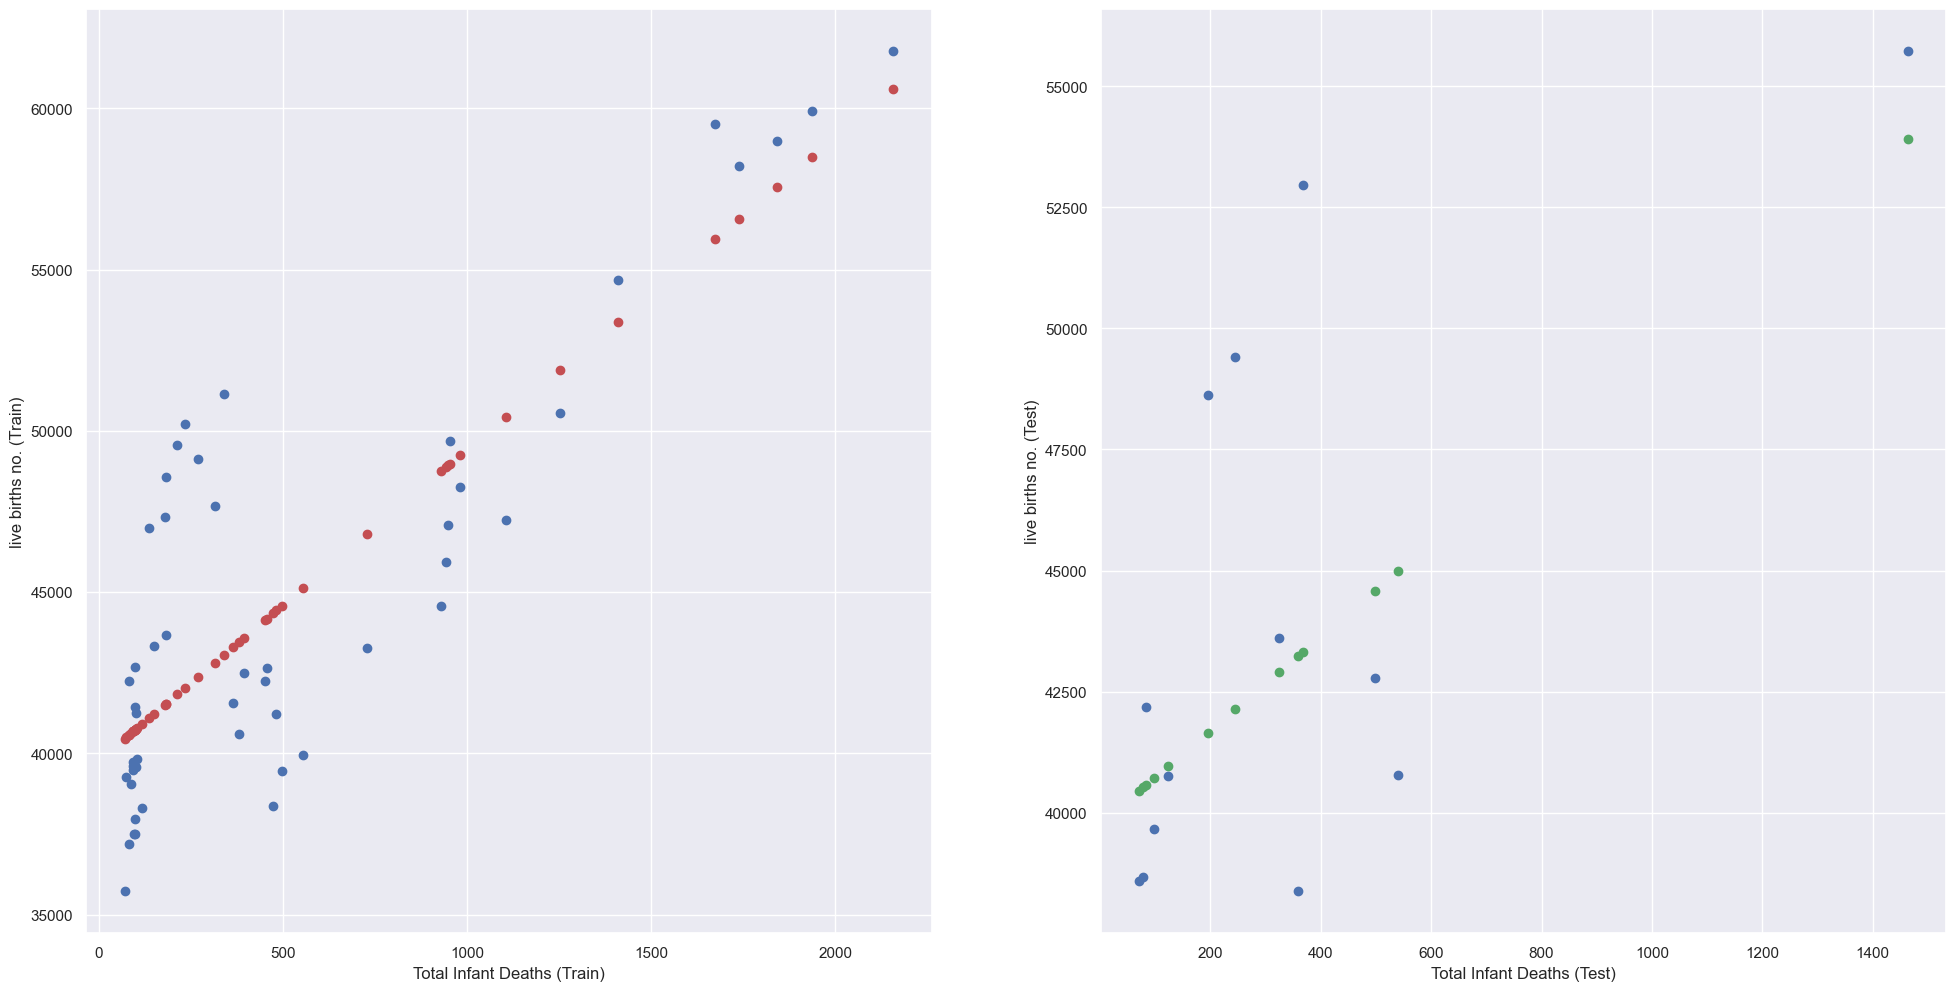

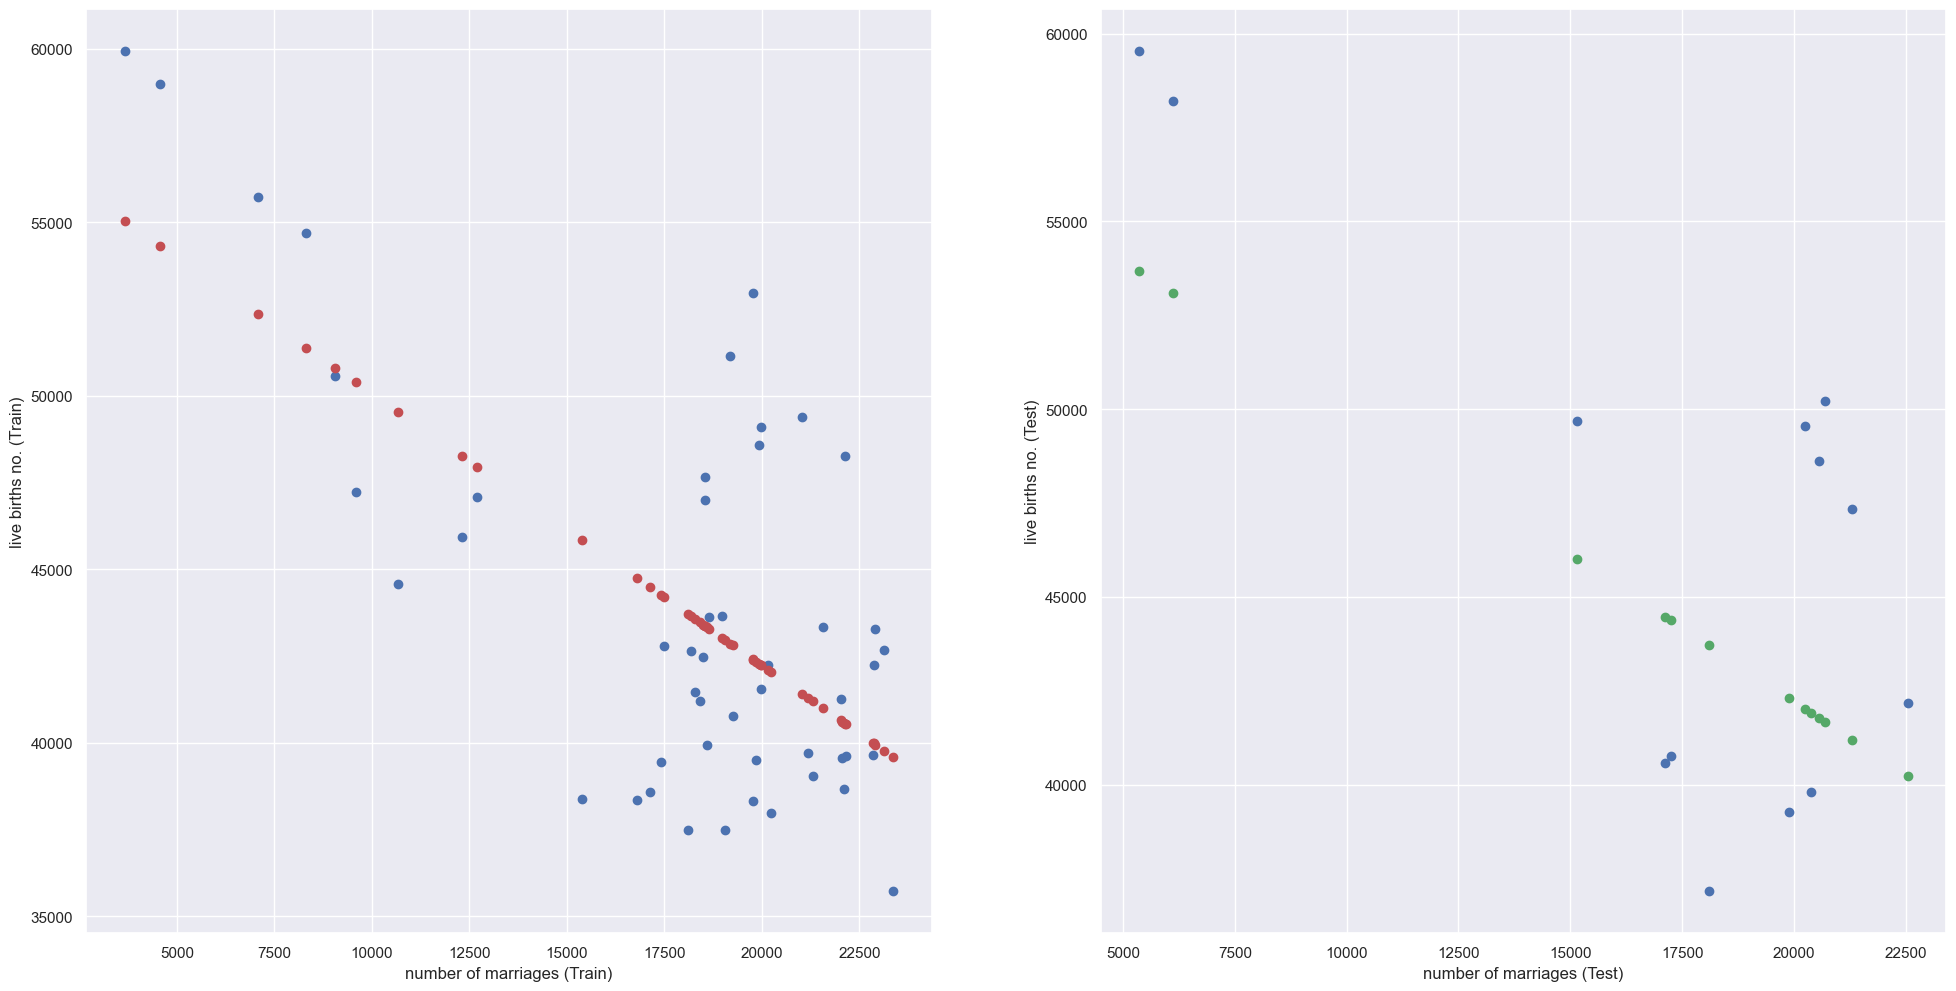

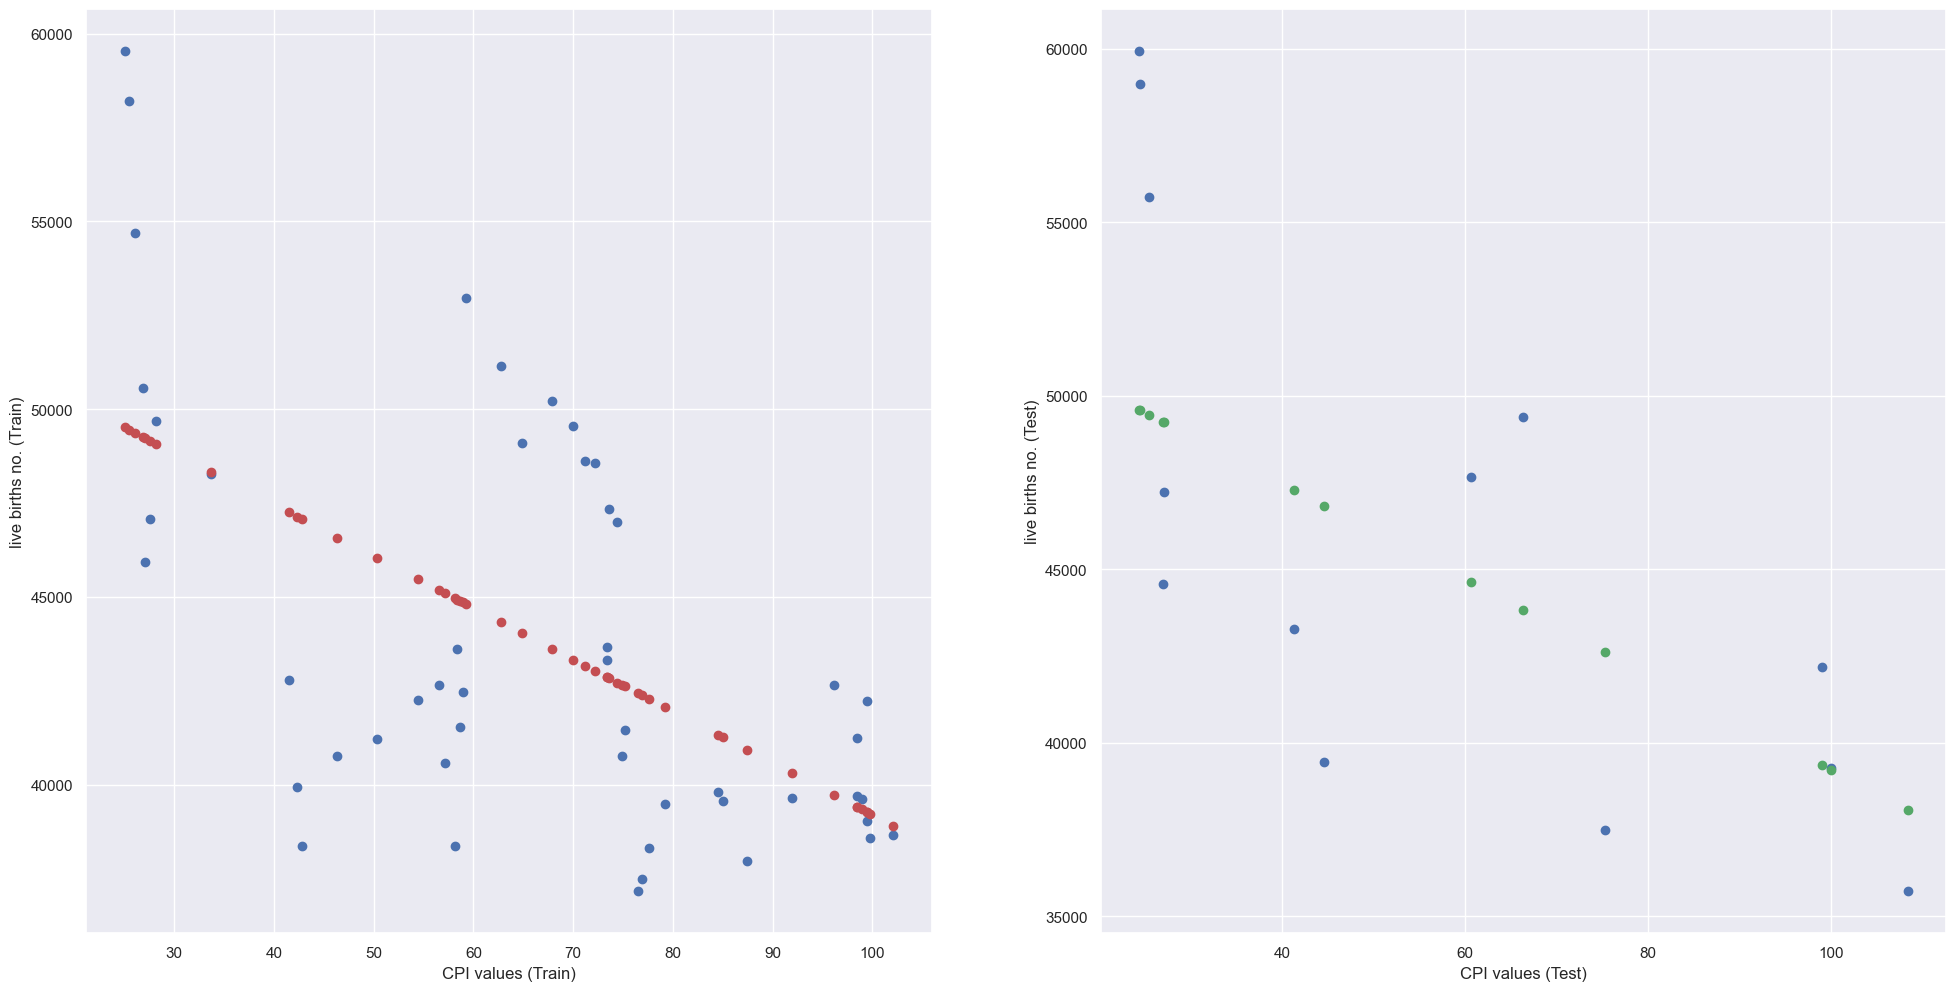

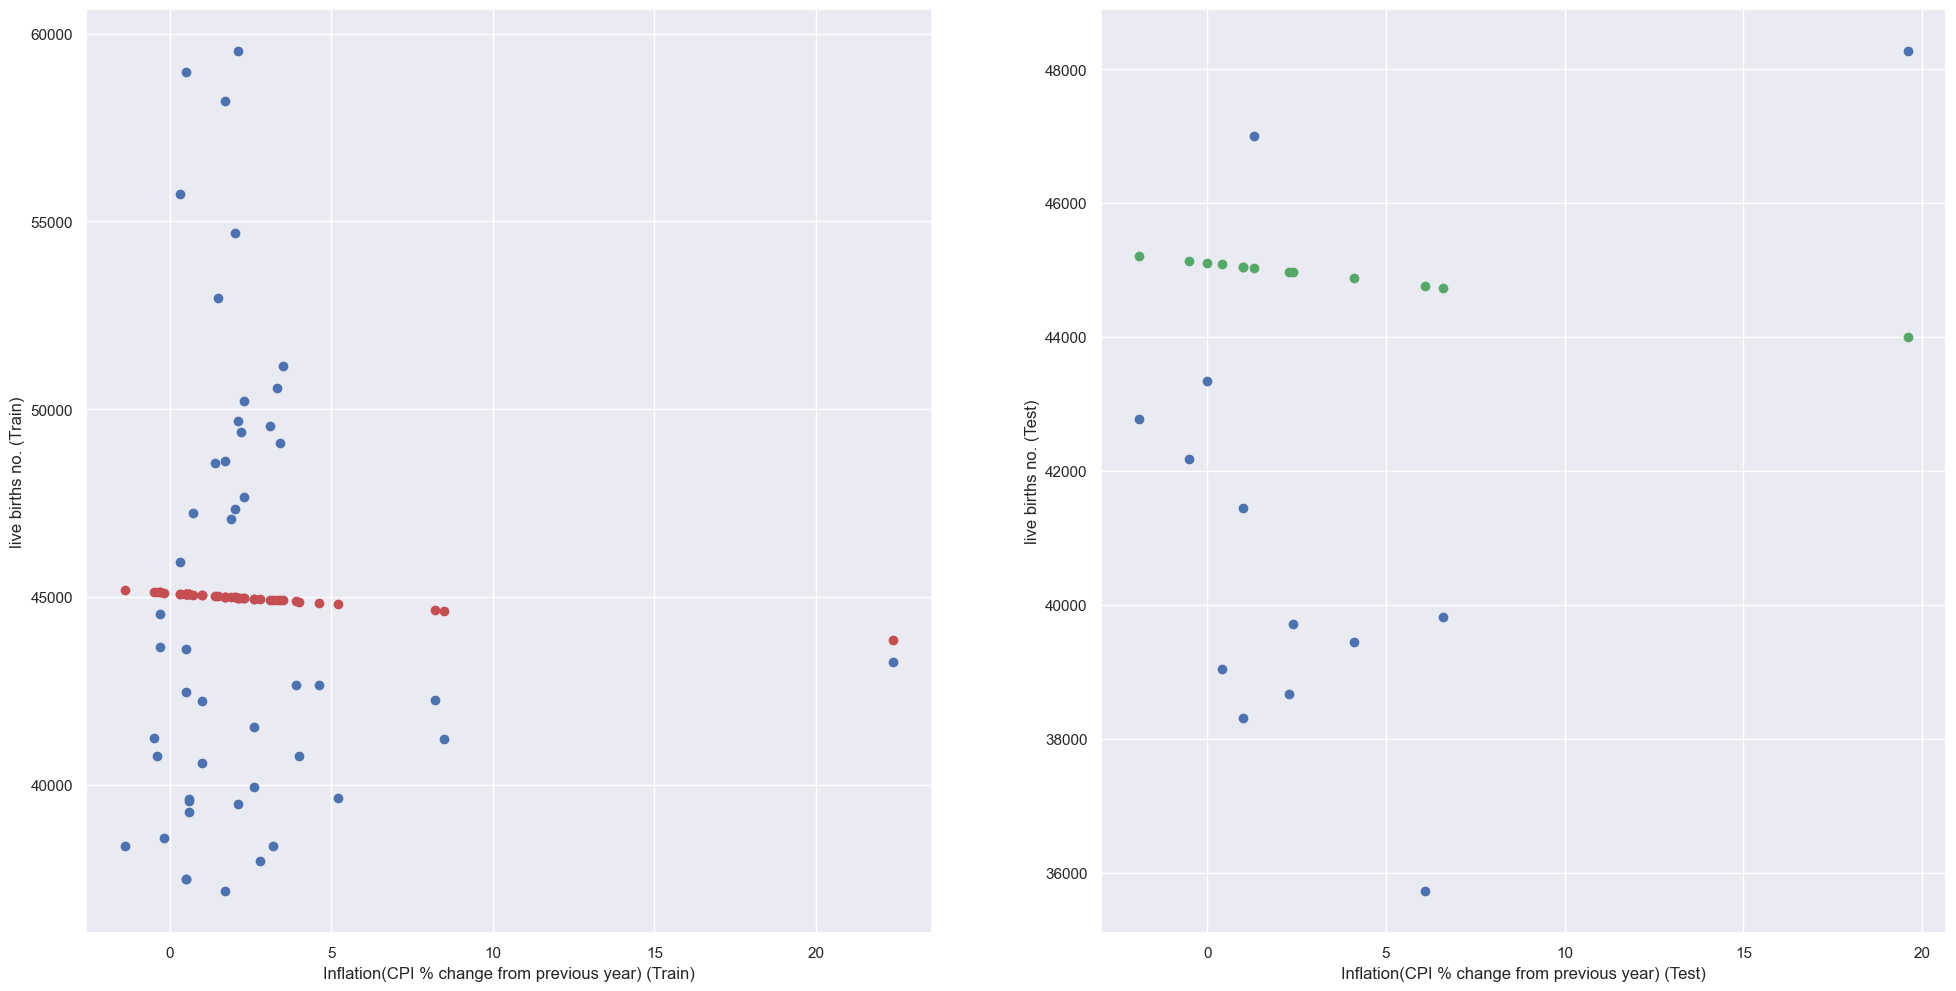

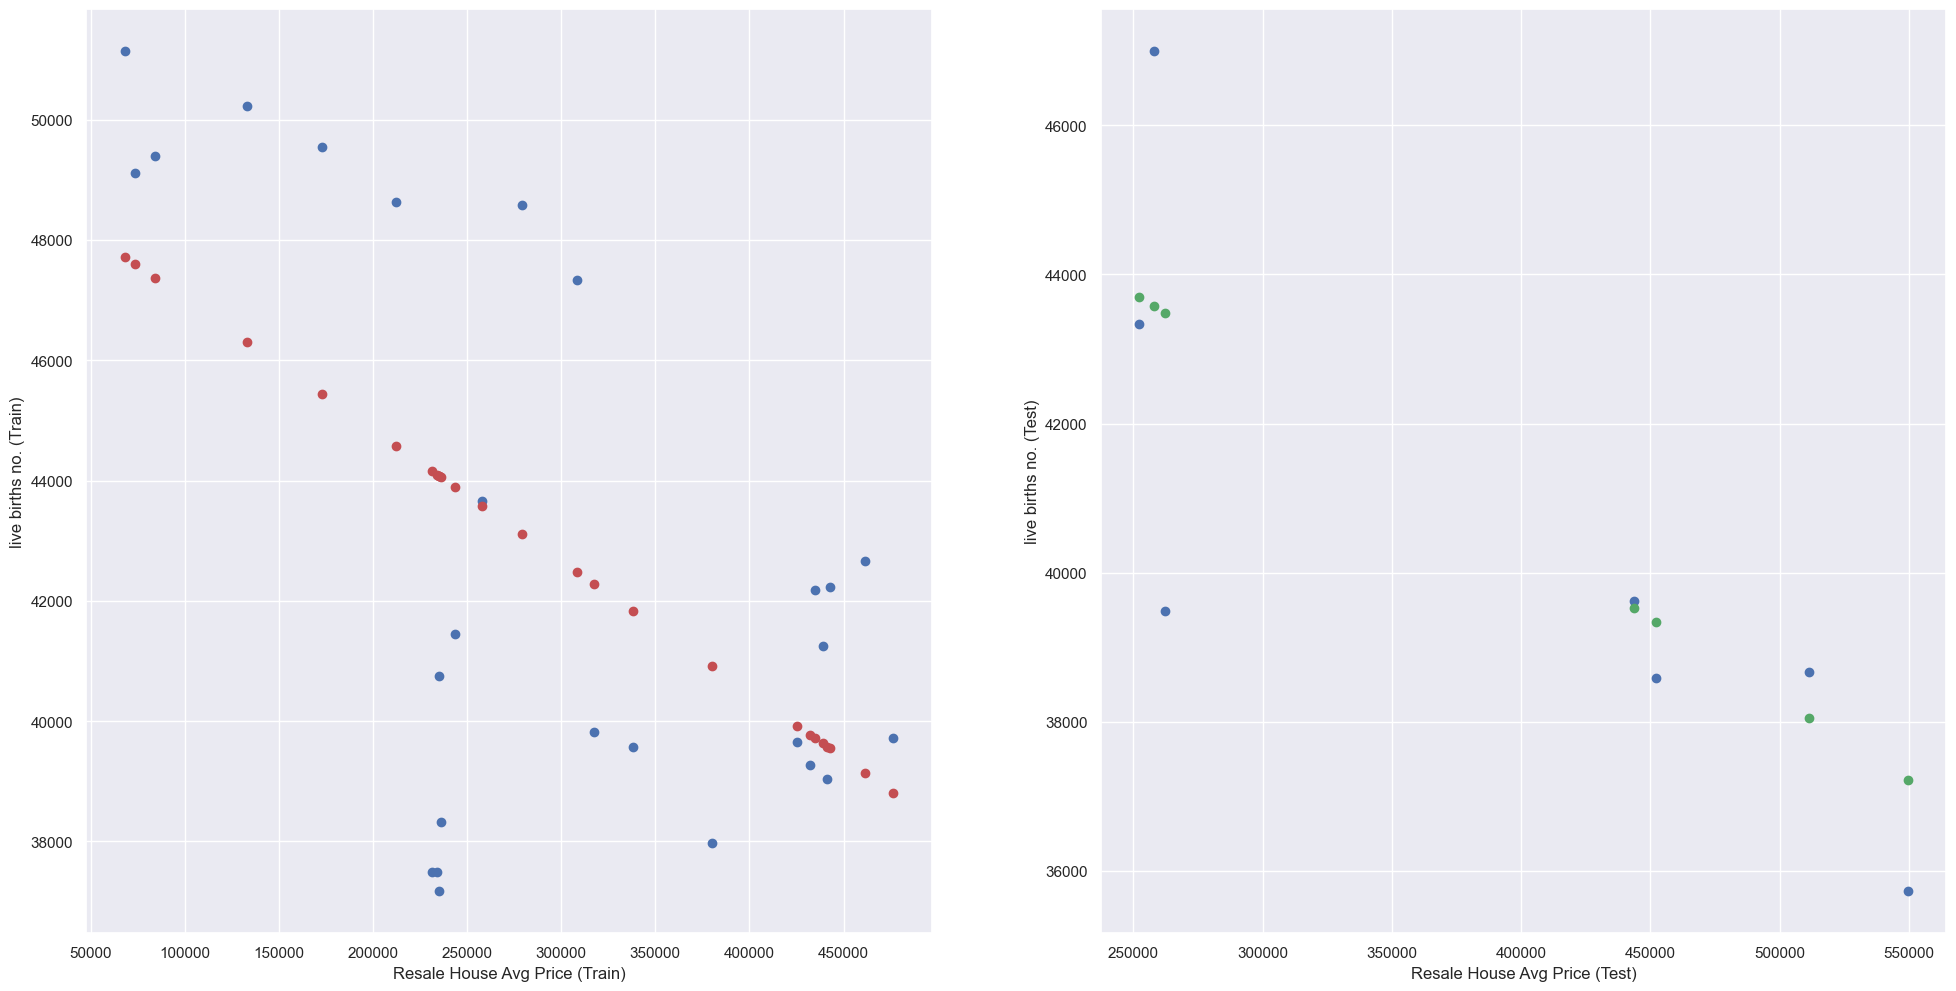

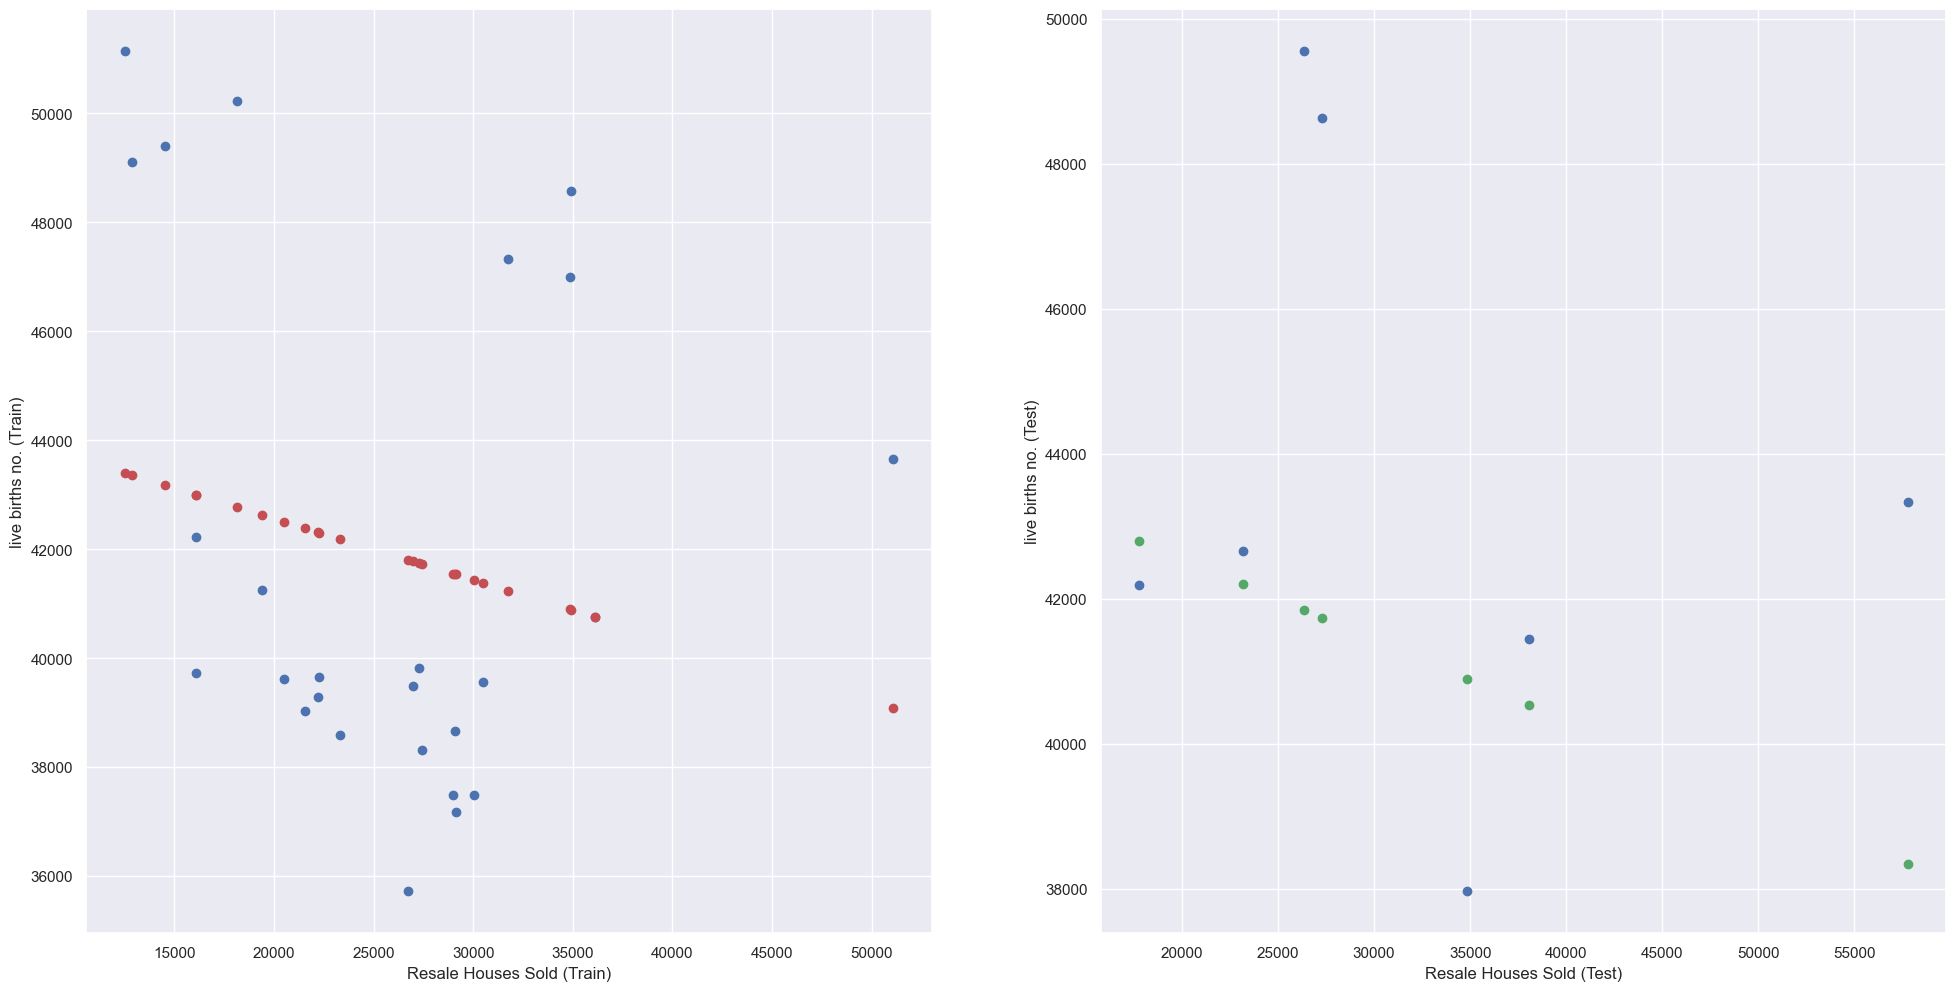

In [3]:
X_all = combined_annual_data[["Total Infant Deaths", "number of marriages", "CPI values", "Inflation(CPI % change from previous year)", "Resale House Avg Price", "Resale Houses Sold"]]
y_original = combined_annual_data['number of live_birth in the year']


for column in X_all:
    print(column)
    x = X_all[column]
    y = y_original.copy()
    mask = ~np.isnan(x) & ~np.isnan(y)
    #print(type(x), type(y), type(mask))
    #break
    
    x = pd.DataFrame(x[mask])
    y = pd.DataFrame(y_original[mask])
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    
    linreg = linear_model.LinearRegression()
    linreg.fit(x_train, y_train)
    
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
    
    # Plot linear regression line for both train and test data, using data from train data to get linear regression line
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(x_train, y_train, color = "b")
    axes[0].scatter(x_train, y_train_pred, color = "r")
    ## axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel(f"{column} (Train)")
    axes[0].set_ylabel("live births no. (Train)")
    axes[1].scatter(x_test, y_test, color = "b")
    axes[1].scatter(x_test, y_test_pred, color = "g")
    ## axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel(f"{column} (Test)")
    axes[1].set_ylabel("live births no. (Test)")
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    print(f"RMSE of test data = {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
    print()
    print()
    
#mask = ~np.isnan(varx) & ~np.isnan(vary)

## The variables against live birth numbers
### Metrics obtained

- For Total Infant Deaths, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [40268.10500118]
> * Coefficients of Regression 	: a =  [[9.32909176]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.6298273913846568
> * Mean Squared Error (MSE) 	: 15480716.756241366
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.6353459267347434
> * Mean Squared Error (MSE) 	: 11495751.908916678
>
>
> * RMSE of test data = 3390.538586849688

- For number of marriages, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [60111.56766904]
> * Coefficients of Regression 	: a =  [[-0.86357062]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.4556502318009954
> * Mean Squared Error (MSE) 	: 20435684.578185767
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4119629874073012
> * Mean Squared Error (MSE) 	: 19742270.069575764
>
>
> * RMSE of test data = 4443.227438425335

- For CPI values, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [52820.39362189]
> * Coefficients of Regression 	: a =  [[-134.87194987]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.3924722507769056
> * Mean Squared Error (MSE) 	: 18435923.036286525
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.3802106976149713
> * Mean Squared Error (MSE) 	: 36280374.63652205
>
>
> * RMSE of test data = 6023.319237473807

- For Inflation(CPI % change from previous year), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [44113.93980489]
> * Coefficients of Regression 	: a =  [[14.16580503]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.00011424506337531781
> * Mean Squared Error (MSE) 	: 33617892.23016518
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.00046062833341675713
> * Mean Squared Error (MSE) 	: 32250045.450991355
>
>
> * RMSE of test data = 5678.912347535517

- For Resale House Avg Price, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [49431.88955744]
> * Coefficients of Regression 	: a =  [[-0.0222203]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.41718847137872617
> * Mean Squared Error (MSE) 	: 10153536.820041455
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4104265766942998
> * Mean Squared Error (MSE) 	: 17615236.310966197
>
>
> * RMSE of test data = 4197.05090640633

- For Resale Houses Sold, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [44458.9286231]
> * Coefficients of Regression 	: a =  [[-0.07584557]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.03362241078442407
> * Mean Squared Error (MSE) 	: 18896170.156316705
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.04106644505780044
> * Mean Squared Error (MSE) 	: 22809662.21448199
>
>
> * RMSE of test data = 4775.946211430986


### Based on the high MSE and RMSE and the low explained variance, R^2, that is even negative, and the scarce amount of data, classification is a better model since there is little data points

### This data is scaled from the monthly data, and as such, has lesser data points so it may be less reliable due to the lesser data points


### The correlation obtained can still be useful to see its relation to the live birth number, as such, we will take note of variables with high correlation to live birth number, such as
> * CPI values => 0.63
> * Resale House Average Prices => -0.65

> * Number of marriages => -0.67 // new, was not seen in monthly data so it is taken into account less heavily, compared to the others, but still see its importance!!

> * Total Infant Deaths => 0.80 // but it is not a cause